In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import math
import matplotlib.pyplot as plt
from PIL import Image
from numpy import fft
from matplotlib.colors import LogNorm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/My Drive/CV_course/HW5/images/"

(-0.5, 1289.5, 814.5, -0.5)

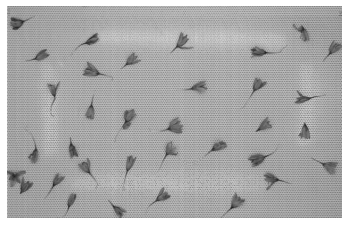

In [ ]:
img = cv2.imread(path + "img_01.jpg", 0)
plt.imshow(img, cmap="gray")
plt.axis('off')

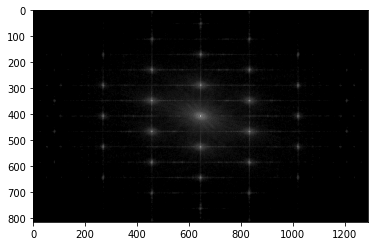

In [ ]:
fourier = fft.fft2(img)
shifted_f = fft.fftshift(np.abs(fourier))
plt.figure()
# https://matplotlib.org/stable/gallery/images_contours_and_fields/colormap_normalizations.html#sphx-glr-gallery-images-contours-and-fields-colormap-normalizations-py
plt.imshow(shifted_f, norm=LogNorm(vmin=10000), cmap='gray')

(815, 1290)


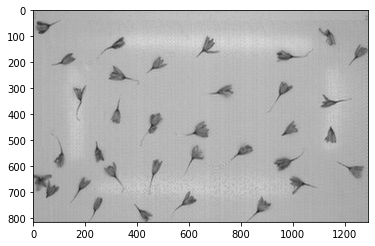

In [ ]:
size = img.shape
print(size)
shifted_f[int(size[0]/2) - 80: int(size[0]/2) + 80, int(size[1]/2) - 150: int(size[1]/2) + 150] = 0
m = np.max(shifted_f)
shifted_f /= m
peaks = shifted_f < 0.001

peaks = fft.ifftshift(peaks)
denoised = fourier * peaks
denoised = np.real(fft.ifft2(denoised))
plt.imshow(denoised, cmap='gray')
plt.show()

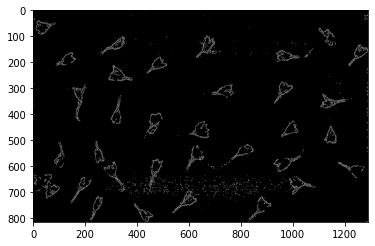

In [ ]:
canny = cv2.Canny(np.uint8(denoised),100,150) #https://stackoverflow.com/questions/19103933/depth-error-in-2d-image-with-opencv-python
plt.figure()
plt.imshow(canny, plt.cm.gray)

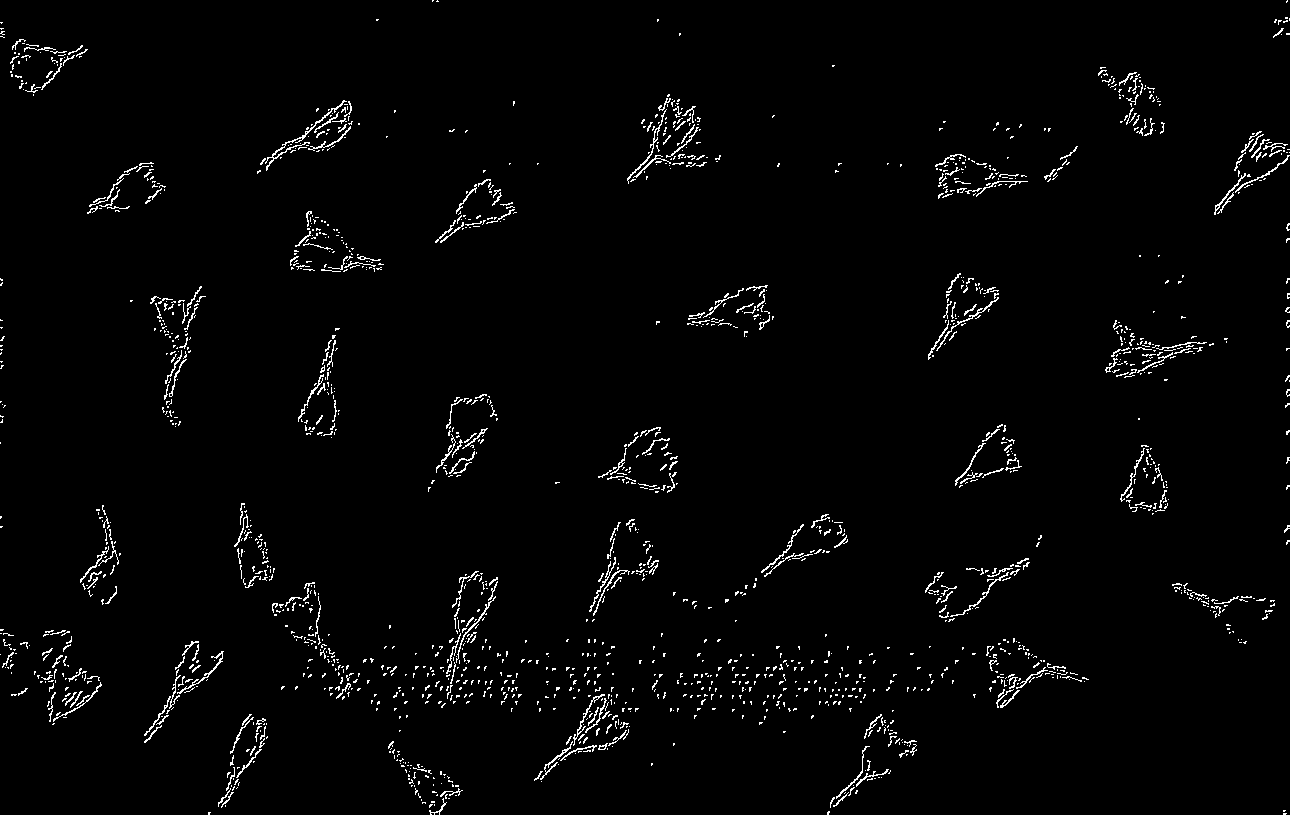

In [ ]:
gX = cv2.Sobel(canny, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=3)
gY = cv2.Sobel(canny, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=3)

combined = cv2.addWeighted(gX, 0.5, gY, 0.5, 0)

cv2_imshow(combined)

In [ ]:
# https://stackoverflow.com/questions/59631756/gradient-orientation-with-arctan2-results-in-flipped-angles
theta =np.degrees(np.arctan2(gX,gY))
print(theta)

[[   0.    0.    0. ...   90.    0.    0.]
 [   0.    0.    0. ...   45.  -45.    0.]
 [   0.    0.    0. ...  135. -135.  180.]
 ...
 [   0.    0.    0. ...  -45.    0.    0.]
 [   0.    0.    0. ...  -45.  -45.    0.]
 [   0.    0.    0. ...  -90.  -90.    0.]]


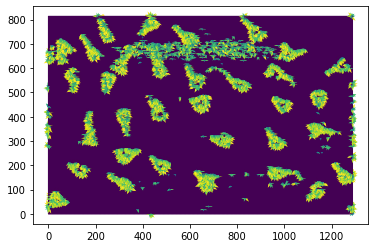

In [ ]:
color = np.sqrt(gY**2 + gX**2) 
plt.quiver(gX,gY,color)
plt.show()

# Q3

In [ ]:
matrix = np.array([
    [0, 0, 255, 0, 0],
    [0, 0, 255, 0, 0],
    [0, 0, 255, 0, 0],
    [0, 0, 255, 0, 0],
    [0, 0, 255, 0, 0]
])

gX = cv2.Sobel(np.uint8(matrix), ddepth=cv2.CV_32F, dx=1, dy=0, ksize=3)
gY = cv2.Sobel(np.uint8(matrix), ddepth=cv2.CV_32F, dx=0, dy=1, ksize=3)

print(gX)
print(gY)

[[    0.  1020.     0. -1020.     0.]
 [    0.  1020.     0. -1020.     0.]
 [    0.  1020.     0. -1020.     0.]
 [    0.  1020.     0. -1020.     0.]
 [    0.  1020.     0. -1020.     0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


# Q4

(-0.5, 268.5, 411.5, -0.5)

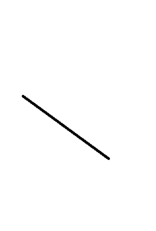

In [4]:
img4 = cv2.imread(path + "img_02.jpg", 0)
plt.imshow(img4, cmap="gray")
plt.axis('off')

In [5]:
X = []
Y = []

size = img4.shape

for i in range(size[0]):
  for j in range(size[1]):
    if img4[i][j] != 255:
      X.append(i)
      Y.append(j)

In [6]:
X_bar = sum(X)/len(X)
Y_bar = sum(Y)/len(Y)
X_sqr_bar = sum([x**2 for x in X])/len(X)
XY_bar = sum([X[i]*Y[i] for i in range(len(X))]) / len(X)

m = (X_bar * Y_bar - XY_bar) / (X_bar**2 - X_sqr_bar)
c = Y_bar - m * X_bar
print(f"{m} * X + {c}")

1.3709995907272559 * X + -202.96710625458064
